# Exercise 02: Seaborn

In [53]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## A. Load dataset

In [36]:
BMI_male = pd.read_csv('BMI_male_with_continent.csv')
BMI_female = pd.read_csv('BMI_female_with_continent.csv')
BMI_female.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Continent
0,Afghanistan,20.44348,20.47765,20.52292,20.56493,20.60867,20.64796,20.68983,20.70902,20.71512,...,20.61850,20.61353,20.65274,20.70828,20.76927,20.83858,20.91021,20.99060,21.07402,Asia
1,Albania,25.17427,25.19088,25.20032,25.21906,25.22359,25.21257,25.20939,25.18918,25.16965,...,25.12797,25.20332,25.27082,25.33198,25.39804,25.46525,25.53328,25.59394,25.65726,Europe
2,Algeria,23.67764,23.80702,23.92626,24.03604,24.13630,24.24213,24.33652,24.42523,24.50904,...,25.49389,25.59477,25.69948,25.81168,25.93081,26.03886,26.15054,26.26096,26.36841,Africa
3,Andorra,25.67324,25.69018,25.69922,25.70089,25.70584,25.70877,25.71239,25.72437,25.74523,...,26.10622,26.14707,26.19542,26.23892,26.28851,26.32247,26.36846,26.40095,26.43196,Europe
4,Angola,20.06763,20.12766,20.19464,20.26439,20.34110,20.42624,20.51389,20.60929,20.70945,...,21.91293,22.07646,22.26093,22.44571,22.63536,22.83412,23.04406,23.26330,23.48431,Africa


## B. Tidy up the dataset

In [38]:
#tidy up the data and put the time into its own column
tidy_BMI_male = pd.melt(BMI_male, id_vars=['Country', 'Continent'], \
     var_name='Time', value_name='BMI')
tidy_BMI_female = pd.melt(BMI_female, id_vars=['Country', 'Continent'], \
     var_name='Time', value_name='BMI')

tidy_BMI_male[['Time']] = tidy_BMI_male[['Time']].apply(pd.to_numeric)
tidy_BMI_female[['Time']] = tidy_BMI_female[['Time']].apply(pd.to_numeric)

tidy_BMI_male.head()

,Country,Continent,Time,BMI
0,Afghanistan,Asia,1980,21.48678
1,Albania,Europe,1980,25.22533
2,Algeria,Africa,1980,22.25703
3,Andorra,Europe,1980,25.66652
4,Angola,Africa,1980,20.94876


## C. Timeseries plot of BMI over time for six continents

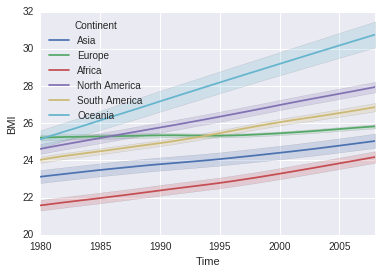

In [13]:
sns.tsplot(data=tidy_BMI_female, time='Time', condition='Continent',\
          value='BMI', unit='Country');

## D. BMI of men in 1990 as swarmplot

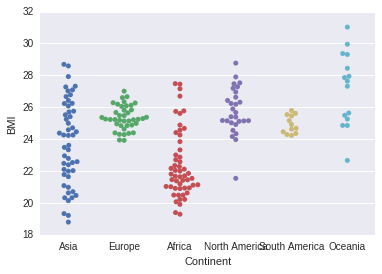

In [45]:
male_1990 = tidy_BMI_female.loc[tidy_BMI_male['Time'] == 1990]
sns.swarmplot(x='Continent', y='BMI', data=male_1990);

## E. Merge datasets

In [44]:
# merge the two dataframes for females and males into one adding a new
# label 'Sex'
tidy_BMI_female['Sex'] = 'female'
tidy_BMI_male['Sex'] = 'male'
tidy_BMI = pd.concat([tidy_BMI_female, tidy_BMI_male])

## F. BMI for men & women in 2000 as whisker plot

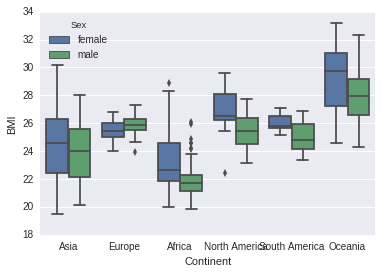

In [59]:
BMI_2000 = tidy_BMI.loc[tidy_BMI['Time'] == 2000]
sns.boxplot(x="Continent", y="BMI", hue="Sex", data=BMI_2000);

## G. BMIs in violinplots

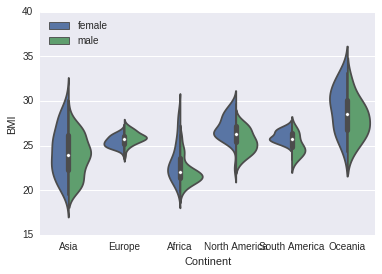

In [56]:
sns.violinplot(x="Continent", y="BMI", hue="Sex", data=BMI_2000,\
               split=True, legend=False);
plt.legend(loc=2);

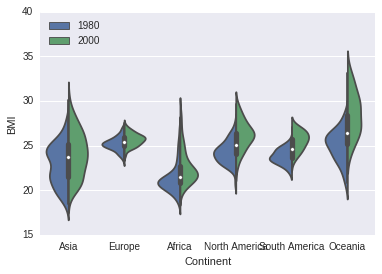

In [64]:
BMI_1980_2000 = tidy_BMI.loc[tidy_BMI['Time'].isin([1980,2000])]
sns.violinplot(x='Continent', y='BMI', hue='Time', data=BMI_1980_2000,\
              split=True, legend=False)
plt.legend(loc=2);

## G. BMIs in barplots

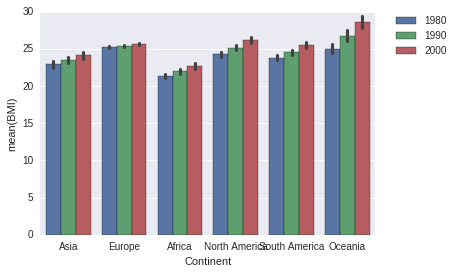

In [70]:
BMI_1980_1990_2000 = tidy_BMI.loc[tidy_BMI['Time']\
                                  .isin([1980,1990,2000])]
sns.barplot(x="Continent", y="BMI", hue="Time", \
            data=BMI_1980_1990_2000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

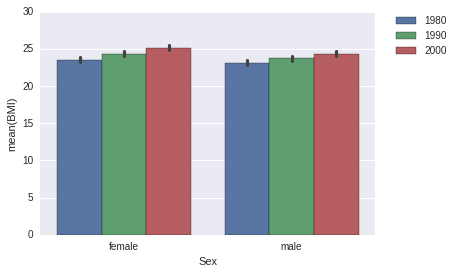

In [71]:
sns.barplot(x="Sex", y="BMI", hue="Time", \
            data=BMI_1980_1990_2000);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);